# Import Dependencies and Read in Data

In [1]:
#import dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
# read in csv data

# create filepath
file_to_load = "heart.csv"

#store data in dataframe
heart_df = pd.read_csv(file_to_load)

#preview dataframe

heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Machine Learning Part One: Random Forest Model VS XGBoost Model
### Which will be better at predicting whether patiens in this dataset have heart disease, a random forest model or a model using XGBoost?

# Heart Disease Predictions with a Random Forest Model

In [3]:
# split data for training and validation

heart_data =  heart_df.copy()

y = heart_data.target

X = heart_data.drop(['target'], axis=1)


train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [4]:
#create and fit a random forest model

rf_model = RandomForestRegressor(random_state=1)

rf_model.fit(train_X, train_y)

RandomForestRegressor(random_state=1)

In [5]:
# run model on validation data and find mean absolute error

rf_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_predictions, val_y)

print(rf_val_mae)

0.044241245136186776


# Heart Disease Predictions with XGBoost

In [6]:
# create a model using XGBoost

xgb_model = XGBRegressor(n_estimators = 1000, learning_rate = 0.1, random_state=1)

# Fit the model

xgb_model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(val_X, val_y)], 
             verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=16, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [7]:
# run model on validation data and find mean absolute error

xgb_predictions = xgb_model.predict(val_X)
xgb_val_mae = mean_absolute_error(xgb_predictions, val_y)

print(xgb_val_mae)

0.0031587081465931635


# Machine Learning Part One Analysis
### Based on the mean absolute error for each of the models above, it is clear that the model using XGBoost performed significantly better at predicting the presence of heart disease in the patients included in this dataset. The bar plot below shows a stark difference between the MAE of the Random Forest Model compared to the MAE of the XGBoost model.

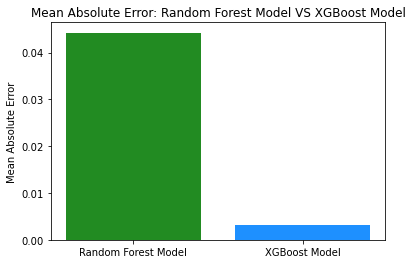

In [27]:
#visualize the difference in mean absolute error between the two models
x_axis = ["Random Forest Model", "XGBoost Model"]
y_axis = [rf_val_mae, xgb_val_mae]

plt.bar(x_axis, y_axis, color=['forestgreen', 'dodgerblue'])
plt.title("Mean Absolute Error: Random Forest Model VS XGBoost Model")
plt.ylabel('Mean Absolute Error')
plt.show()


In [9]:
validation_df = pd.DataFrame(val_X,)
validation_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
49,60,1,0,117,230,1,1,160,1,1.4,2,2,3
525,51,0,2,130,256,0,0,149,0,0.5,2,0,2
119,42,1,1,120,295,0,1,162,0,0.0,2,0,2
629,65,1,3,138,282,1,0,174,0,1.4,1,1,2
186,40,1,0,110,167,0,0,114,1,2.0,1,0,3


In [10]:
validation_df['target'] = val_y

In [11]:
validation_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
49,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
525,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1
119,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
629,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
186,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0


In [12]:
predictions_df = validation_df.copy()

In [13]:
predictions_df['rf'] = rf_predictions
predictions_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,rf
49,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0,0.01
525,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1,1.00
119,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1,1.00
629,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0,0.22
186,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0,0.01


In [14]:
predictions_df['xgb'] = xgb_predictions
predictions_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,rf,xgb
49,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0,0.01,-0.002040
525,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1,1.00,1.000371
119,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1,1.00,0.993064
629,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0,0.22,0.000202
186,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0,0.01,0.000127


# Machine Learning Part Two: How Effective is the XGBoost Model for Different Demographic Groups?
### Does sex or age affect how well the model predicts whether patients have cancer?

# Exploring Demographics in the Data: Gender

In [20]:
#create a copy of the original dataframe to work with
demo_df = heart_df.copy()

#group by sex
sex_ratio = demo_df['sex'].value_counts()
sex_ratio

1    713
0    312
Name: sex, dtype: int64

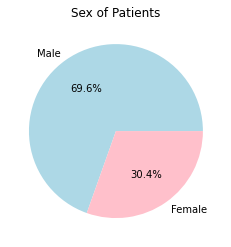

In [25]:
#create a pie chart using Matplotlib to visualize the sex ratio of patients in the data

labels = ["Male", "Female"]
colors = ["lightblue", "pink"]

plt.pie(sex_ratio, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Sex of Patients")
plt.show()

## The sex ratio is pretty uneven. Does the XGBoost model perform equally well for male patients and female patients?

In [29]:
# create separate dataframes for male and female patients and split features from target

male_val = validation_df.loc[validation_df['sex'] == 1]

male_val.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
49,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
119,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
629,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
186,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0
473,41,1,2,130,214,0,0,168,0,2.0,1,0,2,1


In [30]:
female_val = validation_df.loc[validation_df['sex'] == 0]

female_val.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
525,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1
691,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
422,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
27,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
415,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [31]:
male_val_Y = male_val.target

In [32]:
male_val_X = male_val.drop(['target'], axis=1)

In [33]:
female_val_Y = female_val.target

In [34]:
female_val_X = female_val.drop(['target'], axis=1)

In [37]:
# run the XGBoost model on the male-only validation data and get the MAE

male_predictions = xgb_model.predict(male_val_X)
male_val_mae = mean_absolute_error(male_predictions, male_val_Y)

print(male_val_mae)

0.0020003676268235044


In [38]:
# run the XGBoost model on the female-only validation data and get the MAE

female_predictions = xgb_model.predict(female_val_X)
female_val_mae = mean_absolute_error(female_predictions, female_val_Y)

print(female_val_mae)

0.0060232529454829955


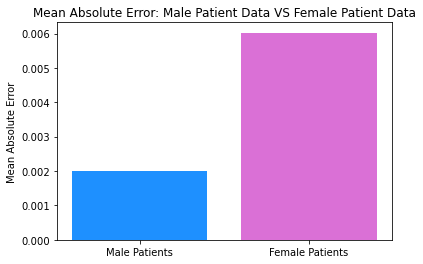

In [39]:
#visualize the difference in mean absolute error when using male vs female patient data
x_axis = ["Male Patients", "Female Patients"]
y_axis = [male_val_mae, female_val_mae]

plt.bar(x_axis, y_axis, color=['dodgerblue', 'orchid'])
plt.title("Mean Absolute Error: Male Patient Data VS Female Patient Data")
plt.ylabel('Mean Absolute Error')
plt.show()

# Exploring Demographics in the Data: Age

In [40]:
# find the minimum, maximum, and average age of patients in the dataset

age_df = heart_df.copy()

min_age = age_df['age'].min()

max_age = age_df['age'].max()

avg_age = age_df['age'].mean()

print(f'Minimum Age:{min_age}, Maximum Age: {max_age}, Average Age {avg_age}')

Minimum Age:29, Maximum Age: 77, Average Age 54.43414634146342
